In [1]:
# For this notebook you should have the following packages installed: pandas, altair, vega_datasets, matplotlib
# You can uncomment the line below and run this cell to install the required packages.

# !pip install pandas altair vega_datasets matplotlib

# Vega-Altair - Declarative Visualization in Python
Website: https://altair-viz.github.io/index.html

As mentioned in the title, **Vega-Altair** is a Python library that lets us create data visualizations in a declarative manner.

**Vega-Altair** is built on **Vega-Lite**, which describes it self as _a high-level grammar of interactive graphics_. **Vega-Altair** is a powerful library that lets us create complex interactive visualizations like the one below. 

_Try brushing in the scatterplot._

We will learn to use **Vega-Altair** to create plots over two classes. In addition to creating the plots, we will look at adding interactivity to our visualizations and the importance of doing so. 

In [2]:
import altair as alt
from vega_datasets import data

df = data.cars()
brush_selection = alt.selection_interval()

base_plot = alt.Chart(df)

scatterplot = base_plot.mark_point().encode(
    x="Miles_per_Gallon:Q",
    y="Weight_in_lbs:Q",
    color=alt.condition(brush_selection, "Origin:N", alt.value("gray")),
    opacity=alt.condition(brush_selection, alt.value(0.7), alt.value(0.3))
    
).add_params(
    brush_selection
)

histogram = base_plot.mark_bar().encode(
    y="Origin:N",
    color="Origin:N",
    x="count():Q",
).transform_filter(
    brush_selection
)

scatterplot & histogram

alt.VConcatChart(...)

## Declarative vs Imperative

Earlier, we referred to Vega-Altair as a declarative visualization library. In contrast, matlplotlib is an imperative visualization library. 

### Imperative approach
In the imperative approach, we specify step-by-step instructions on how to create a visualization. The approach mixes a visualization specification that depends on the data with execution details independent of the data. 

Let us see an example by creating a faceted scatterplot. Suppose we have __cars__ dataset with information like _country of origin_, _Weight in lbs_, and _Miles per gallon_ about different cars. For each country of origin, we want to create a scatterplot of _Weight_ vs _Miles per gallon_.

In [3]:
import matplotlib.pyplot as plt
from vega_datasets import data

cars = data.cars()
# Print the dataset head
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


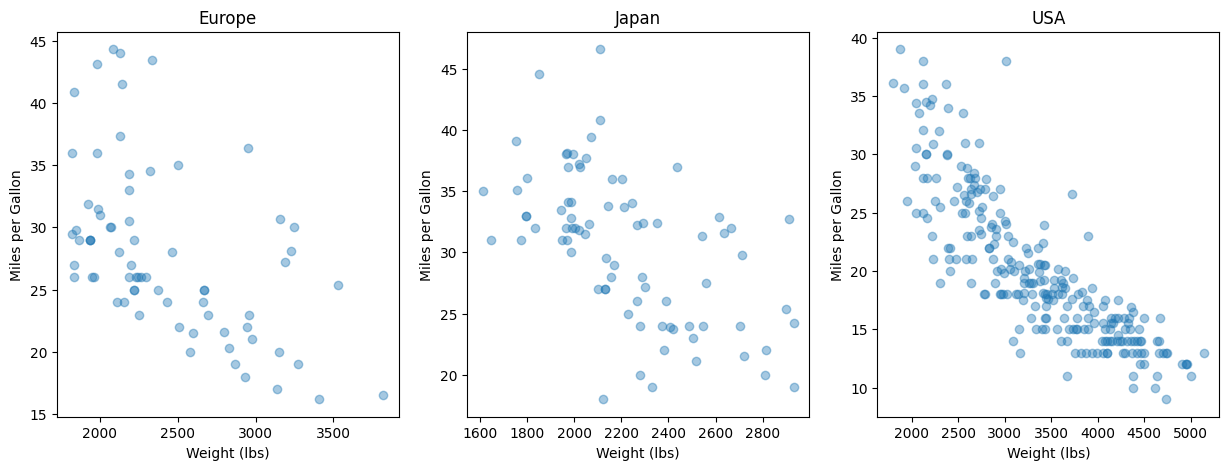

In [4]:
# Group the dataset by 'Origin'
grouped_cars = cars.groupby("Origin")

# Create empty plots with three subplots
fig, axes = plt.subplots(1, len(grouped_cars), figsize=(15, 5))

# Loop over the groups
for i, group_entry in enumerate(grouped_cars):
    key, group = group_entry

    ax = axes[i] 
    ax.scatter(group["Weight_in_lbs"], group["Miles_per_Gallon"], alpha=0.4) # add scatterplot to position i
    # Set titles and labels
    ax.set_title(key)
    ax.set_xlabel("Weight (lbs)")
    ax.set_ylabel("Miles per Gallon")


plt.show()

In the above code, we mix the <span style="color:red">execution</span> and the <span style="color:blue">specification</span> to create a faceted scatterplot. 

We had to specify each step in generating the plot. We started by <span style="color:red">grouping the dataframe</span> on the _Origin_ column. We <span style="color:red">created an empty plot</span> with three columns and one row and then looped over the grouped dataframe to <span style="color:blue">create a plot</span> and then <span style="color:red">insert</span> it in the right place.

For each plot, we had to <span style="color:red">specify</span> that the _key_ should be used as the title and _x_ and _y_ axis labels.

### Declarative approach
In the declarative approach, we specify the final visualization we want rather than the steps to creating the visualization. We separate the visualization specification from the execution details on creating the visualization.  

Let us contrast that by creating the same plot in _Vega-Altair_ using a declarative approach.

In [5]:
import altair as alt
from vega_datasets import data

cars = data.cars()

# create a chart object, associate df as the data for the chart, map various columns to visual channels
alt.Chart(cars).mark_point().encode(
    x="Weight_in_lbs",
    y="Miles_per_Gallon",
    column="Origin",
    # color="Cylinders:O"
)

alt.Chart(...)

In Vega-Altair code, we only specify the type of mark for each row in the data and specify encoding between the visual channels (like _x_, _y_, and _column_) and attributes in the data.

We rely on the library to translate this specification into a visualization.

## Grammar of Graphics

_Grammar_ is usually defined as fundamental principles or rules of an art of science. For data visualization, __Grammar of Graphics__ is a framework to describe and construct visualizations in a structured manner. The concept was introduced in 2005 by Leland Wilkinson in the book "The Grammar of Graphics" and was later expanded by Hadley Wickham in their 2010 paper "A Layered Grammar of Graphics."

The main idea of the framework is to think of visualizations as a composition of independent components rather than a named chart like a _scatterplot_ or _histogram_. The following components are described in the framework:

- __Data__ - Source of information being visualized
- __Aesthetics__ - Mappings between dimensions of the data and visual channels like _position_, _color_, etc.
- __Geometric Objects__ - The shape of each data point in the visualization
- __Statistics__ - These are the transformations to be applied before visualizing the data.
- __Layer__ - A layer is an object with any combination of previously described elements independent of other layers. We can combine multiple layers to create a complex visualization.
- __Facets__ - Specify if and how to split the data to create subplots.
- __Coordinate System__ - Describe the type of coordinate system the visualization should use – cartesian or polar.


## Vega-Lite

The project website defines __Vega-Lite__ as a declarative language for data visualization. Vega-Lite uses JavaScript Object Notation (JSON) format to describe visualizations. The JSON specification is then converted by the Vega-Lite compiler into visualizations. 

Let us see a simple example of Vega-Lite specification to create a scatterplot.

```jsonc
{
  "$schema": "https://vega.github.io/schema/vega-lite/v5.**json**",
  "data": {
    "url": "data/cars.csv" // Load data from a csv file
    },****
  "mark": "point", // Specify that each item in the data should be represented as point (empty circle)
  "encoding": {
    "x": {
      "field": "Weight_in_lbs", // Specify that Weight_in_lbs column in the data is mapped to x-axis
      "type": "quantitative"
      },
    "y": {
      "field": "Miles_per_Gallon", // Specify that Miles_per_Gallon column in the data is mapped to y-axis
      "type": "quantitative"
      }
  }
}
```
The above JSON specification creates the following plot:

<image src="./vega_lite_basic_scatterplot.png" height="300px" style="margin:0"/>

You can play with the visualization at the following link: [Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega-lite/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykBaADZ04JAKyUAVhDYA7EABoQAEzjQATjRyZ289AEEABNCTY46nILaZjMNgHcassobvqIcHA-OGks5YYINIJqhjg+FIJWshCGAGZs6obESJpsDLFQqRCUiiqmKKigDOqCaPmYSARZ7lIy8gC+SsjqANblXk6YeXCyUGzKTmRooAAeIyBxNHCCyuUA6nA0ZFgA+k6rgkwQeZgAnuHlAI4MfjqVOqQgTSB7E1Mzc+gAssFqq+HqqwDiSFFyuwOcGOp1k51MNCuDWhQA)

## Vega-Altair

Vega-Altair is based on Vega-Lite. Vega-Altair provides a Python API to generate Vega-Lite specification in JSON format.

Notebook environments like Jupyter have builtin support for, the JSON is automatically displayed as a chart.

### Installation

To start creating Vega-Altair plots, we start by importing the `altair` package. The latest release of Vega-Altair is 5.1 as of now. We can check if we have that by printing the `__version__` attribute.

In [6]:
import altair as alt
alt.__version__

'5.1.2'

### Loading data

Vega-Altair works on top of pandas dataframes. You can pass the data to the top-level `Chart` object like so:

```python
    alt.Chart(data)
```

Vega-Altair can accept data in the following formats:
- Pandas dataframes
- Url string (remote and local) pointing to a `JSON` or `CSV`
- as a `Data` object which includes inbuilt Vega-Altair data objects like `UrlData,` `InlineData,` and `NamedData.`
- GeoJSON objects for map-based visualizations
- Generated datasets using inbuilt generator functions like `sequence.`

We will use pandas dataframe and URLs to load the data for this lecture. For details and example code on using other data types with Vega-Altair, please refer to the [documentation](https://altair-viz.github.io/user_guide/data.html).

Let us look at examples of plots using different types of input data. For now, you can ignore the details of how the plot is generated.

#### Pandas Dataframe

In [7]:
import pandas as pd

data = pd.DataFrame({
    'x': ['A', 'B', 'C', 'D', 'E'],
    'y': [5, 3, 6, 7, 2]
    })

alt.Chart(data).mark_bar().encode(x="x", y="y")

alt.Chart(...)

#### Url

In [8]:
data_url = "https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/cars.json"

alt.Chart(data_url).mark_point().encode(x="Weight_in_lbs", y="Miles_per_Gallon")

ValueError: Weight_in_lbs encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)

Notice the above code cell throws an error saying `... encoding field is specified without type ...`. When we pass a URL to the data instead of a pandas object, Vega-Altair cannot infer the data type in a column. We can manually specify the type by appending the column name and a `:`. e.g. instead of `Weight_in_lbs` we write `Weight_in_lbs:Q`. We can now fix the code above and re-run the cell.

Data types supported by Vega-Altair are:
- __Nominal (N)__
  - Nominal columns contain categorical data.
- __Ordinal (O)__
  - Ordinal columns contain ordered data.
- __Quantitative (Q)__
  - Quantitative columns represent numerical data.
- __Temporal (T)__
  - Temporal columns contain date-time or interval data.

**Limitation**: By default Vega-Altair does not support datasets with more than `5000` rows. You can either disable this limitation using `alt.data_transformers.disable_max_rows()` or by passing data as url.

**Vega Datasets**: The __Vega__ project has a collection of datasets that we will be using throughout this notebook. They are available in a nifty python package `vega_datasets`. 

We can load a dataset as a dataframe

In [9]:
from vega_datasets import data

df = data.cars()

df.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


We can also access the dataset as an URL.

In [10]:
df_url = data.cars.url

df_url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/cars.json'

### Marks and Encodings

Once we have specified our data, the next step is to specify how to represent each point in the data. We can specify the _graphical mark_ we want to use using the `mark_*` method. Some of the different marks supported by Vega-Altair are `point,` `bar,` `circle,` `line,` and `area.` For other mark types, please refer to the [ documentation](https://altair-viz.github.io/user_guide/marks/index.html).

For this section, we will load the Iris Flower dataset.

In [11]:
iris_df = data.iris()
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Now let us create a chart with data set to `iris_df` and each item in the data represented by a `point` mark.

In [12]:
alt.Chart(iris_df).mark_point()

alt.Chart(...)

Voila! We have our first Vega-Altair visualization. A `point` mark represents each item in the dataset. They are plotted on each other since we have not associated anything with the position of the points.

So, the next step is mapping different visual channels to fields in our dataset. For this step, we use the `encode` method.

In [13]:
alt.Chart(iris_df).mark_point().encode(x="sepalLength")

alt.Chart(...)

We now see the points are placed according the value of the `sepalLength` column along `x` axis. Let us repeat the same for `y` axis.

In [14]:
alt.Chart(iris_df).mark_point().encode(x="sepalLength", y="sepalWidth")

alt.Chart(...)

Now we have a scatterplot of `sepalLength` vs `sepalWidth`. In Vega-Altair we don't create scatterplot directly, but specify mark as a point and encode data to `x` and `y` axes to compose a scatterplot.

In the above example, we specified the encodings using keyword arguments (`x="sepalLength"`). This works when we want something simple, like our scatterplot. In the scatterplot, we see both our axes start at `0`. What if we do not want that? We have to specify that axes need not start at `0`.

To pass such extra parameters to encoding specifications, Vega-Altair provides a method syntax (`x=alt.X("sepalLength")`). For e.g., the above chart using method syntax will look as follows:

In [15]:
alt.Chart(iris_df).mark_point().encode(
    x=alt.X("sepalLength"),
    y=alt.Y("sepalWidth")
    )

alt.Chart(...)

We can now use methods to specify details about the axes. Lets update the chart to have non-zero axes.

In [16]:
alt.Chart(iris_df).mark_point().encode(
    x=alt.X("sepalLength").scale(zero=False),
    y=alt.Y("sepalWidth").scale(zero=False)
    )

alt.Chart(...)

Other types of encodings we can specify are `color`, `shape`, `tooltips`, etc. For all different encoding channels and extra options like `scale`, please refer to the [documentation](https://altair-viz.github.io/user_guide/encodings/index.html).

Let us encode two additional fields `color` and `tooltip`:

In [17]:
alt.Chart(iris_df).mark_point().encode(
    x=alt.X("sepalLength").scale(zero=False),
    y=alt.Y("sepalWidth").scale(zero=False),
    color="species",
    tooltip=["species", "petalLength", "petalWidth"]
    )

alt.Chart(...)

__Note__: Vega-Altair provides a lot of customization options. Please refer to the [documentation](https://altair-viz.github.io/user_guide/customization.html) for details.

### Data Transforms

We frequently do data transformations or data filtering before we create visualizations.

For e.g. we can use pandas to group the above dataset by `species` column and then use altair to visualize a bar chart of median `sepalLength` for each species.

In [18]:
iris_grouped_median = iris_df.groupby("species").aggregate("median")

iris_grouped_median

,sepalLength,sepalWidth,petalLength,petalWidth
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


The species column is now index of the new dataframe. Altair cannot use indices in the visualization, so we have to convert it into a column.

In [19]:
iris_grouped_median = iris_grouped_median.reset_index()
iris_grouped_median

,species,sepalLength,sepalWidth,petalLength,petalWidth
0,setosa,5.0,3.4,1.50,0.2
1,versicolor,5.9,2.8,4.35,1.3
2,virginica,6.5,3.0,5.55,2.0


Now we can create our bar chart:

In [20]:
alt.Chart(iris_grouped_median).mark_bar().encode(
    x="species:N",
    y="sepalLength"
)

alt.Chart(...)

Vega-Altair allows data transformation using chart specification. Data transformations using pandas offers more flexibility, but result in lot more code and cannot be used when loading data directly from url.

To specify data transformations using specifications we have to use the top-level method `transform_*`. Some of the available data transform in Vega-Altair are `aggregate`, `filter`, and `calculate`. We will look at example of using these three transforms. For a complete list of available transforms and syntax for their use please refer to the [documentation](https://altair-viz.github.io/user_guide/transform/index.html).

#### Aggregate

We can re-create the above chart using the `aggregate` transform in chart specification directly.

In [21]:
alt.Chart(iris_df).mark_bar().transform_aggregate(
        sepalLength_agg="median(sepalLength)",
        groupby=["species"]
    ).encode(
        x="species",
        y="sepalLength_agg:Q"
    )

alt.Chart(...)

In the above example we added a top-level `aggregate` transform, however Vega-Altair also supports specifying aggregation in encoding directly. For example, the next cell shows the above chart with encoding level aggregate specification.

In [22]:
alt.Chart(iris_df).mark_bar().encode(
        x="species",
        y="median(sepalLength)"
    )

alt.Chart(...)

Vega-Altair supports different aggregation functions including `count`, `min`, `max`, `average`, `median` and `stddev`.

#### Filter

We can filter our dataset directly in the Vega-Altair specification using the `transform_filter` top-level method. `transform_filter` takes in different arguments to filter the dataset. One way to filter dataset is using Filter predicates. Vega-Altair provides different predicates to like `equal`, `range`, `less than`, `greater than`, etc. Further we can use logical operands like `and`, `or` and `not` to combine multiple predicates.

Please refer to the [documentation](https://altair-viz.github.io/user_guide/transform/filter.html) for more predicates and other ways to filter the data.

Let us create a scatterplot for `sepalLength` vs `sepalWidth` where we keep points with `sepalLength` greater than equal to `5`.

In [23]:
alt.Chart(iris_df).mark_point().encode(
        x="sepalLength",
        y="sepalWidth"
    ).transform_filter(
        alt.FieldGTEPredicate(field="sepalLength", gte=5)
    )

alt.Chart(...)

#### Advanced Transforms - Calculate

With the `calculate` transform we can derive new fields. For example, we can multiply `petalLength` and `petalWidth` to create a new column `petalArea` and then plot a bar chart with mean `petalArea` for each species.

In [24]:
alt.Chart(iris_df).mark_bar().transform_calculate(
        petalArea="datum.petalLength * datum.petalWidth",
    ).encode(
        x="species",
        y="mean(petalArea):Q"
    )

alt.Chart(...)

### Composing Multi-View Charts

Vega-Altair supports combining multiple charts into one view. Such composition is useful when we want to visualize a lot of variables, but don't want to overload a single chart by using multiple encoding channels.

Vega-Altair supports four basic chart compositions. We will look at each one in detail. For this section we will load the cars dataset from `vega_datasets`. At the end we will explore how to combine these techniques to create a complex analysis dashboard.

In [25]:
cars = data.cars()
cars

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


#### Layer

Layering allows us to combine multiple marsk on top of each other.

As an example lets create a line chart of average weight of cars across time.

In [26]:
line = alt.Chart(cars).mark_line().encode(
    x="year(Year):T",
    y="average(Weight_in_lbs):Q"
)
line

alt.Chart(...)

**Note**: We assigned our charts to a variable `line` and returned the variable from the cell. We can now reuse this chart in another cell down the line.

Now, lets create the same plot with a `circle` mark for each averaged point.

In [27]:
point = alt.Chart(cars).mark_circle().encode(
    x="year(Year):T",
    y="average(Weight_in_lbs):Q"
)
point

alt.Chart(...)

We can now overlay two charts on top of each other to create a line chart with the average point highlighted using a circle mark.

In [28]:
alt.layer(line, point)

alt.LayerChart(...)

We can also use `+` operator as a shorthand to layer charts.

In [29]:
line + point

alt.LayerChart(...)

Layering can also be used to created __dual-axis charts__. We will create two line charts for average weight and average mileage across years. Our goal is to combine the charts so that it is easy to compare the trend.

In [30]:
weight_line = alt.Chart(cars).mark_line().encode(
    x="year(Year):T",
    y="average(Weight_in_lbs):Q"
)
weight_line

alt.Chart(...)

In [31]:
miles_line = alt.Chart(cars).mark_line(color="red").encode(
    x="year(Year):T",
    y="average(Miles_per_Gallon):Q"
)
miles_line

alt.Chart(...)

We can now layer the two charts to see the trends in a single chart

In [32]:
weight_line + miles_line

alt.LayerChart(...)

Layered charts share their domain by default. When two domains are not comparable, we end up with a chart which is not readable. We can ask Vega-Altair to resolve the domains independent of each other to create a __dual-axis__ chart. We need to use `alt.layer` syntax.

In [33]:
alt.layer(weight_line, miles_line).resolve_scale(y="independent")

alt.LayerChart(...)

#### Facet

Faceting is used to create subsets of the data and create a plot for each plot.

One way create facet charts by using `row` and `column` encoding channels. Let us create a histogram of car weights and then facet it across country of origin.

In [34]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X("Weight_in_lbs", bin=True),
    y="count()",
)

alt.Chart(...)

If we want to see the histograms for each country one besides the other we use `column` encoding.

In [35]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X("Weight_in_lbs", bin=True),
    y="count()",
    color="Origin",
    column="Origin",
)

alt.Chart(...)

We can use `row` encoding to have the charts appear one below the other

In [36]:
alt.Chart(cars).mark_bar().encode(
    x=alt.X("Weight_in_lbs", bin=True),
    y="count()",
    color="Origin",
    row="Origin"
)

alt.Chart(...)

Another way to create a facet chart is to use the top-level `facet` operator

In [37]:
alt.Chart().mark_bar().encode(
    x=alt.X("Weight_in_lbs", bin=True),
    y="count()",
    color="Origin"
).facet(
    data=cars,
    column="Origin"
)

alt.FacetChart(...)

__Note__: When using `facet` operator we don't specify data in the `Chart` object but in the `facet` operator.

Explicitly using the `facet` operator allows us to create multiple charts and then specify `facet` once during layering operation. Vega-Altair does not support layering of faceted views, so we have to layer the views and then specify the `facet` operation.

In [38]:
line = alt.Chart().mark_line().encode(
    x="year(Year):T",
    y="average(Weight_in_lbs)",
    color="Origin",
)

point = alt.Chart().mark_circle().encode(
    x="year(Year):T",
    y="average(Weight_in_lbs)",
    color="Origin",
)

alt.layer(line + point).facet(data=cars, column="Origin")

alt.FacetChart(...)

#### Concatenate

Concatenation is the most flexible way to compose charts in Vega-Altair. In contrast to faceting where we have same plot for different subsets of data, with concatenation we can combine arbitary charts vertically and horizontally.

Let's create use the two line plots we created earlier `weight_line` and `miles_line` and concat them horizontally using `hconcat` operator.

In [39]:
alt.hconcat(weight_line, miles_line)

alt.HConcatChart(...)

We can also use the `|` operator to do horizontal concatenation.

In [40]:
weight_line | miles_line

alt.HConcatChart(...)

We can acheieve a vertical concatenation using `vconcat` method or the `&` operator.

In [41]:
alt.vconcat(weight_line, miles_line)

alt.VConcatChart(...)

In [42]:
weight_line & miles_line

alt.VConcatChart(...)

We can combine any number of charts in any orientation using a combination of `hconcat` and `vconcat`.

#### Repeat

Concatenation operators are quite flexible, but they result in a lot of repitition of code. We can see that in `weight_line` and `miles_line` charts only the field for `y` encoding has changed.

We can use the `repeat` operator to specify a chart specification as a template and replace parts of it using the _repeater_ variable. We can have a `column` or `row` repeater and we can specify within an encoding which one the specification should use.

We will recreate the above `hconcat` example using `repeat` operator.

In [43]:
alt.Chart(cars).mark_line().encode(
    x="year(Year):T",
    y=alt.Y(alt.repeat("column"), aggregate="average")
).repeat(
    column=["Weight_in_lbs", "Miles_per_Gallon"]
)

alt.RepeatChart(...)

We can also use the `row` and `column` repeater together. Let's create a SPLOM (Scatterplot Matrix) using the `repeat` operator.

In [44]:
list(cars.columns)

['Name',
 'Miles_per_Gallon',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight_in_lbs',
 'Acceleration',
 'Year',
 'Origin']

In [45]:
fields_to_include = ["Miles_per_Gallon", "Horsepower", "Weight_in_lbs", "Acceleration"]

splom = alt.Chart(cars).mark_circle().encode(
    x=alt.X(alt.repeat("column"), type="quantitative"),
    y=alt.Y(alt.repeat("row"), type="quantitative")
).properties(
    height=200,
    width=200
).repeat(
    row=fields_to_include,
    column=fields_to_include
)

splom

alt.RepeatChart(...)

#### Dashboard

Let's create a dashboard to visualize multiple aspects of the cars dataset. We will use `layer`, `facet`, `repeat`, `hconcat` and `vconcat` together to build our dashboard step by step.

We will start with a histogram of `year` vs average `mileage` of the cars. We will the overlay a line which shows the global average of `mileage` for the entire dataset.

In [46]:
histogram = alt.Chart(cars).mark_bar().encode(
    x="year(Year):O",
    y="average(Miles_per_Gallon)"
)

global_average_line = alt.Chart(cars).mark_rule(stroke="red").encode(
    y="average(Miles_per_Gallon)"
)

histogram + global_average_line

alt.LayerChart(...)

Now let's turn these charts into templates and use the `repeat` operator to create histograms for the `weight`, and `displacement` of the cars in addition to the `mileage`.

In [53]:
columns_to_visualize = ["Miles_per_Gallon", "Weight_in_lbs", "Displacement"]

histogram = alt.Chart().mark_bar().encode(
    x="year(Year):O",
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative")
)

global_average_line = alt.Chart().mark_rule(stroke="red").encode(
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative")
)

hist_line = alt.layer(histogram, global_average_line).repeat(
    data=cars,
    row=columns_to_visualize
)
hist_line

alt.RepeatChart(...)

Now let's use the `repeat` operator to create a scatterplot matrix and concat it horizontally with histograms

In [47]:
columns_to_visualize = ["Miles_per_Gallon", "Weight_in_lbs", "Displacement"]
dimension = 200

histogram = alt.Chart().mark_bar().encode(
    x="year(Year):O",
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative")
).properties(
    height=dimension,
    width=250
)

global_average_line = alt.Chart().mark_rule(stroke="red").encode(
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative")
).properties(
    width=250
)

hist_line = alt.layer(histogram, global_average_line).repeat(
    row=columns_to_visualize
) 

splom = alt.Chart().mark_point().encode(
    x=alt.X(alt.repeat("column"), type="quantitative"),
    y=alt.Y(alt.repeat("row"), type="quantitative")
).properties(
    height=dimension,
    width=dimension
).repeat(
    row=columns_to_visualize,
    column=columns_to_visualize
)

splom_hist_line = alt.hconcat(splom, hist_line, data=cars)
splom_hist_line

alt.HConcatChart(...)

Now to wrap up the dashboard we will bring in our faceted line chart which shows trend in average `Horsepower` over the `years` faceted by `country of origin`.

In [48]:
columns_to_visualize = ["Miles_per_Gallon", "Weight_in_lbs", "Displacement"]
dimension = 200

histogram = alt.Chart().mark_bar().encode(
    x="year(Year):O",
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative"),
).properties(
    height=dimension,
    width=250
)

global_average_line = alt.Chart().mark_rule(stroke="red").encode(
    y=alt.Y(alt.repeat("row"), aggregate="average", type="quantitative")
).properties(
    width=250
)

hist_line = alt.layer(histogram, global_average_line).repeat(
    row=columns_to_visualize
) 

splom = alt.Chart().mark_point().encode(
    x=alt.X(alt.repeat("column"), type="quantitative"),
    y=alt.Y(alt.repeat("row"), type="quantitative"),
    color="Origin"
).properties(
    height=dimension,
    width=dimension
).repeat(
    row=columns_to_visualize,
    column=columns_to_visualize
)

facet = alt.Chart().mark_line().encode(
    x="year(Year):T",
    y=alt.X("average(Horsepower)").scale(zero=False),
    color="Origin",
    column="Origin"
).properties(
    height=dimension,
    width=dimension * 1.5
)

splom_hist_line = alt.hconcat(splom, hist_line)
splot_hist_line_facet = alt.vconcat(splom_hist_line, facet, data=cars)

splot_hist_line_facet

alt.VConcatChart(...)

Please refer to the [documentation](https://altair-viz.github.io/user_guide/compound_charts.html) for details on how to use the composition APIs to create complex charts.

### Summary

Topics we covered today:
- Introduction to Vega-Altair
- Specifying data
- Specifying marks and encodings
- Data transformations
- Composing multiple views

## Next class

In the end we created a complex dashboard which allows us to visualize multiple attributes of the data at once. Complex dashboards like the one we created are hard to use without interactivity. We also want to publish our dashboards for others to use.

In our next class we will discuss:
- importance of interactivity in visualization
- how to make Vega-Altair plots interactive
- how to connect controls like sliders, input boxes and buttons to the plots
- publish the plots to be able to share it with others

__Note__: If time permits we will briefly cover `Cartographic Visualization` in Vega-Altair

## Resources

[Visualization Curriculum](https://uwdata.github.io/visualization-curriculum/intro.html) by UW data group.

[Jupyter Notebooks for Vega-Altair](https://github.com/altair-viz/altair_notebooks) by the authors.

[Pycon Tutorial](https://www.youtube.com/watch?v=ms29ZPUKxbU) by the Jake VanderPlas (Vega-Altair author) ([Github](https://altair-viz.github.io/altair-tutorial/README.html)).